## Stock Market Prediction Using Linear Regression

### Importing Packages

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### reading data

In [4]:
data=pd.read_csv(r'C:\Data Sets\NFLX.csv')


In [5]:
data

,Date,Open,High,Low,Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,9905200


In [6]:
data.head()

,Date,Open,High,Low,Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,16906900


In [7]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
data

,Date,Open,High,Low,Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,9905200


In [24]:
data.shape

(1009, 6)

### Data Visualizations for the data

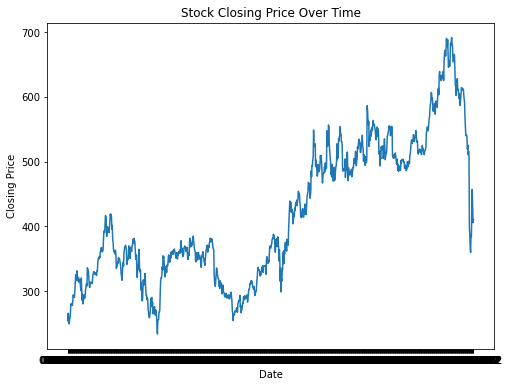

In [33]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date'),
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.show()

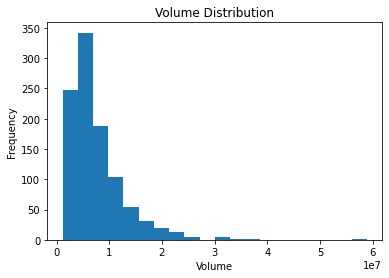

In [54]:
plt.hist(data['Volume'],bins=20)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume Distribution')
plt.show()

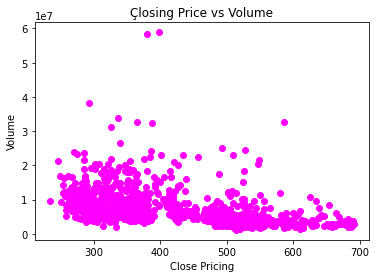

In [62]:
plt.scatter(data['Close'],data['Volume'],c='#FF00FF')
plt.xlabel('Close Pricing')
plt.ylabel('Volume')
plt.title('Çlosing Price vs Volume')
plt.show()

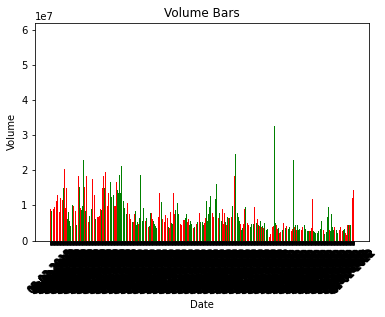

In [66]:
plt.bar(data['Date'], data['Volume'], color=['g' if c > o else 'r' for c, o in zip(data['Close'], data['Open'])])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Bars')
plt.xticks(rotation=45)
plt.show()

### Split the data into train and test data

In [10]:
from sklearn.model_selection import train_test_split as tts
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (807, 4)
Shape of X_test: (202, 4)
Shape of y_train: (807,)
Shape of y_test: (202,)


In [11]:
X_train

,Open,High,Low,Volume
29,315.799988,317.000000,307.339996,9925200
280,366.399994,366.959991,356.799988,7541400
507,373.750000,378.109985,369.720001,4772900
706,490.459991,491.149994,475.839996,5416600
877,512.690002,519.789978,510.959991,2534900
...,...,...,...,...
106,415.950012,419.119995,411.100006,11127500
270,351.459991,356.170013,348.250000,5937800
860,544.239990,544.640015,531.659973,2722500
435,278.049988,285.750000,277.350006,6248400


In [12]:
X_test

,Open,High,Low,Volume
628,498.649994,510.440002,498.649994,5608000
631,505.450012,508.290009,486.679993,5910300
741,507.350006,514.500000,499.579987,4177400
514,385.329987,387.320007,377.899994,3930100
365,323.399994,325.850006,314.230011,16302500
...,...,...,...,...
780,512.500000,526.510010,506.589996,3981700
334,354.380005,357.880005,348.709991,5020100
210,288.130005,295.739990,274.720001,12800600
350,363.200012,370.850006,363.200012,4138600


In [13]:
y_train

29     313.480011
280    358.779999
507    373.690002
706    476.619995
877    517.570007
          ...    
106    418.970001
270    354.299988
860    535.960022
435    281.859985
102    398.179993
Name: Close, Length: 807, dtype: float64

In [14]:
y_test

628    509.640015
631    494.730011
741    500.859985
514    380.070007
365    315.100006
          ...    
780    518.020020
334    355.730011
210    275.329987
350    370.019989
78     349.730011
Name: Close, Length: 202, dtype: float64

### define the model

In [15]:
from sklearn.linear_model import LinearRegression as lr

### train the linear regression model using training data

In [16]:
linreg=lr()
linreg.fit(X_train,y_train)

LinearRegression()

### predict the output for the test data using the fitted model

In [17]:
pred=linreg.predict(X_test)

In [18]:
pred

array([508.50321043, 492.62212893, 506.90449821, 380.94182806,
       319.21989499, 480.18715624, 493.19190981, 319.76836801,
       360.88513911, 328.20274267, 525.65342643, 330.6872646 ,
       585.49040778, 313.74228617, 339.0655614 , 545.79575054,
       534.23209689, 617.70538634, 353.56087943, 394.49539655,
       391.31562932, 375.74646101, 267.52101584, 355.53684016,
       435.40391522, 371.82283179, 307.61763078, 353.94646372,
       298.45756331, 508.92854916, 564.63490346, 515.02113043,
       412.72801806, 338.47880048, 507.37221819, 350.70305945,
       587.05620386, 291.68294966, 361.47827438, 364.85775562,
       357.07851409, 350.83773715, 345.62475666, 609.5406714 ,
       370.54870306, 361.7258483 , 309.96762301, 634.54402689,
       503.2908216 , 548.48183343, 493.26620747, 517.31859121,
       310.1716574 , 490.80794092, 425.20508019, 569.58177989,
       309.66368892, 307.22619528, 329.76896942, 318.22362479,
       508.01952861, 279.52883644, 283.77796743, 484.61

### Determine the performancesb of the model using suitable metrics

In [19]:
from sklearn.metrics import mean_squared_error,r2_score 
mse=mean_squared_error(y_test,pred)
rmse=mse**0.5
r2=r2_score(y_test,pred)


In [20]:
print("Mean Squared Error(MSE):",mse)
print("Root Mean Squared Error(RMSE):",rmse)
print("R-Squared(R2) Score:",r2)

Mean Squared Error(MSE): 15.976946096727882
Root Mean Squared Error(RMSE): 3.997117223290791
R-Squared(R2) Score: 0.9986297713881387


### define the model

In [354]:
from sklearn.ensemble import RandomForestRegressor as rfr
rf_model=rfr()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [360]:
feature_importances=rf_model.feature_importances_
threshold=0.1
important_features=X.columns[feature_importances>threshold]

In [364]:
refined_X_train=X_train[important_features]
refined_X_test=X_test[important_features]

In [366]:
refined_X_train

,High,Low
29,317.000000,307.339996
280,366.959991,356.799988
507,378.109985,369.720001
706,491.149994,475.839996
877,519.789978,510.959991
...,...,...
106,419.119995,411.100006
270,356.170013,348.250000
860,544.640015,531.659973
435,285.750000,277.350006


In [369]:
refined_X_test

,High,Low
628,510.440002,498.649994
631,508.290009,486.679993
741,514.500000,499.579987
514,387.320007,377.899994
365,325.850006,314.230011
...,...,...
780,526.510010,506.589996
334,357.880005,348.709991
210,295.739990,274.720001
350,370.850006,363.200012


In [372]:
y_pred = rf_model.predict(X_test)

# Compare the predicted values with the actual values
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(prediction_results)

         Actual   Predicted
628  509.640015  507.562899
631  494.730011  493.518201
741  500.859985  510.329201
514  380.070007  384.618599
365  315.100006  320.817301
..          ...         ...
780  518.020020  515.861097
334  355.730011  352.537392
210  275.329987  286.802203
350  370.019989  365.789798
78   349.730011  352.941196

[202 rows x 2 columns]


In [374]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 25.81532275589768
Root Mean Squared Error (RMSE): 5.0808781481056675
R-squared (R2) Score: 0.9977860040554428
